### Using simple package to solve ODE - ordinary differential equations
* Analytical solution of many ODE can be found on [wiki](http://localhost:8888/?token=da44f81ae74e8e38259e5ad357b00a9d3b04b6900730f1cb)
* Here we are using numeriacal integration method
* Boundary condition is needed to get the equation

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

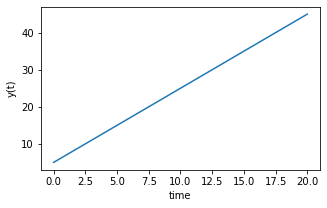

In [6]:
# The simplest ODE might be dy/dt = k, and the solution should be y(t) = kt + C

# function that returns dy/dt
def model(y, t):
    dydt = 2
    return dydt
#initial condition
y0 = 5

# time points (x range)
t = np.linspace(0, 20)

# solve ODE: integration over t
# API scipy.integrate.odeint(func, y0, t, args=(), ....)
y = odeint(model, y0, t)

plt.figure(figsize=(5, 3))
plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

### [apmonitor](https://apmonitor.com/pdc/) website has some great examples

* To connect ODE with physical world models, google "physical model with ode"
* One example [first order ode](http://www.phox.at/upload/Physical%20modelling%20based%20on%20first%20order%20ODEs%20(v1.3).pdf)

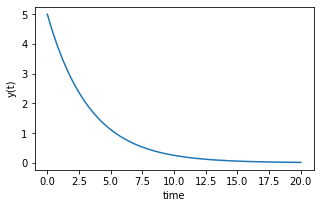

In [8]:
# First examplle: y' = -ky

def model(y, t):
    k = 0.3
    dydt = -k * y
    return dydt

y0 = 5
t = np.linspace(0, 20)
y = odeint(model, y0, t)
plt.figure(figsize=(5, 3))
plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

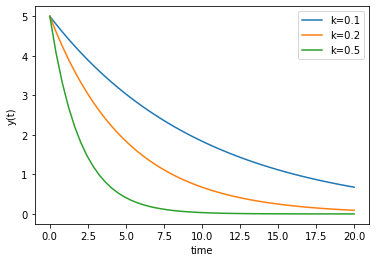

In [11]:
# What if we want to calculate multiple k
def model(y, t, k):
    dydt = -k * y
    return dydt

y0 = 5
t = np.linspace(0, 20)
all_k = [0.1, 0.2, 0.5]
all_y = {}
for k in all_k:
    y = odeint(model, y0, t, args=(k, ))
    all_y[k] = y

plt.plot()
for k, y in all_y.items():
    plt.plot(t, y, label="k={}".format(k))
    plt.xlabel("time")
    plt.ylabel("y(t)")
plt.legend()
plt.show()

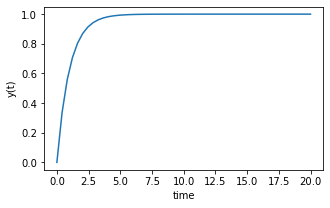

In [23]:
# y' = -ky + b => k = 1, b = 1
# As shown in the figure, the y0, k, and b affect the curve shape a lot!
def model(y, t):
    dydt = - y + 1
    return dydt

y0 = 0
t = np.linspace(0, 20)
y = odeint(model, y0, t)
plt.figure(figsize=(5, 3))
plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

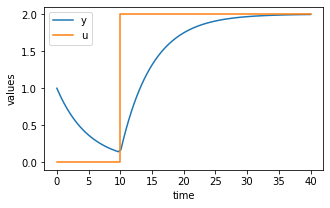

In [24]:
# Two variables, y and u, where u is knonw
# 5y' = -y + u, where u steps from 0 to 2 at t = 10
# because u is know, we can put the condition inside the model

def model(y, t):
    if t < 10:
        u = 0
    else:
        u = 2
    dydt = (-y + u) / 5
    return dydt

y0 = 1
t = np.linspace(0, 40, 100)
y = odeint(model, y0, t)
plt.figure(figsize=(5, 3))
plt.plot(t, y, label="y")
plt.plot([0, 10, 10, 40], [0, 0, 2, 2], label="u")
plt.xlabel("time")
plt.ylabel("values")
plt.legend()
plt.show()

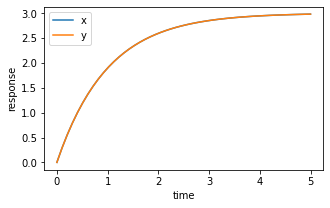

In [28]:
# Two unknowns, x and y
# system equations, with two boundaries
# x' = 3exp(-t), y'=3 - y
#x0 = 0, y0 = 0
# We should pass in list which contains 2 items

def model(z, t):
    x, y = z
    dxdt = 3 * np.exp(-t) # does not depends on x
    dydt = -y + 3
    dzdt = [dxdt, dydt]
    return dzdt

z0 = [0, 0] # Pass initial condition in list
t = np.linspace(0, 5)
z = odeint(model, z0, t)
plt.figure(figsize=(5, 3))
plt.plot(t, z[:, 0], label="x")
plt.plot(t, z[:, 1], label="y")
plt.xlabel("time")
plt.ylabel("response")
plt.legend()
plt.show()

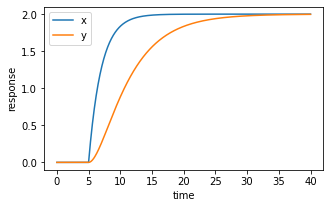

In [30]:
# Two unknowns + third variable
# system equations
# 2x' = -x + u, 5y' = -y + x
# x0 = 0, y0 = 0, u = 2S(t-5), a step function change from 0 to 1 at t=5, then multiple by 2

def model(z, t):
    x, y = z
    u = 0 if t < 5 else 2
    dxdt = (-x + u) / 2
    dydt = (-y + x) / 5
    return [dxdt, dydt]

z0 = [0, 0]
t = np.linspace(0, 40, 401)
z = odeint(model, z0, t)
plt.figure(figsize=(5, 3))
plt.plot(t, z[:, 0], label="x")
plt.plot(t, z[:, 1], label="y")
plt.xlabel("time")
plt.ylabel("response")
plt.legend()
plt.show()

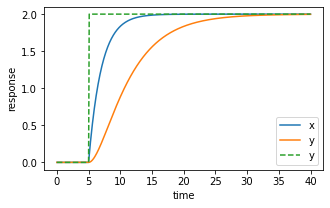

In [35]:
# How to take u out of the model equation (sometimes you might have to!)
# We pass u as a parameter, like k in the past
def model(z, t, u):
    x, y = z
    dxdt = (-x + u) / 2
    dydt = (-y + x) / 5
    return [dxdt, dydt]

z0 = [0, 0]
N = 401
t = np.linspace(0, 40, N)

# Store solution
x, y = [0], [0]
# We need to form u(t)
u = np.zeros(N)
u[51:] = 2 # 10 points for every t=1, so [51:] is t > 5

# Now for each t, we need to solve ODE, with only 2 data points
# Need to reset initial conditions
for i in range(1, N):
    tspan = [t[i - 1], t[i]]
    z = odeint(model, z0, tspan, args=(u[i], ))
    x.append(z[1][0])
    y.append(z[1][1])
    # Next initial condition
    z0 = z[1]

    
plt.figure(figsize=(5, 3))
plt.plot(t, x, label="x")
plt.plot(t, y, label="y")
plt.plot(t, u, '--', label="y")
plt.xlabel("time")
plt.ylabel("response")
plt.legend()
plt.show()